# Importing csv

In [1]:
import pandas as pd

plants=pd.read_csv('../plantbase/data/plants_with_image_dimensions_v1.csv').drop(columns='Unnamed: 0')

In [2]:
plants.head()

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
4,100069,Rosaceae,Crataegus,Crataegus azarolus L.,Stem,100069.jpg,800,533


# Exploring the 'content' column

In [7]:
#sorting the dataset by genus and content 
contents=plants.groupby(["genus", "content"]).size().reset_index(name="count")
contents.head(15)

,genus,content,count
0,Campanula,Branch,49
1,Campanula,Entire,171
2,Campanula,Flower,365
3,Campanula,Fruit,6
4,Campanula,Leaf,69
5,Campanula,Stem,13
6,Crataegus,Branch,91
7,Crataegus,Entire,40
8,Crataegus,Flower,175
9,Crataegus,Fruit,107


In [8]:
#sorting the dataset by genus and count 
contents=contents.sort_values(['genus','count'],ascending=[True, False])

contents.head(15)

,genus,content,count
2,Campanula,Flower,365
1,Campanula,Entire,171
4,Campanula,Leaf,69
0,Campanula,Branch,49
5,Campanula,Stem,13
3,Campanula,Fruit,6
11,Crataegus,LeafScan,330
8,Crataegus,Flower,175
10,Crataegus,Leaf,167
9,Crataegus,Fruit,107


In [5]:
#understanding how many content cateogories by plants
contents.groupby('genus').count().drop(columns='content')

,count
genus,
Campanula,6
Crataegus,7
Galanthus,4
Geranium,7
Hyacinthoides,6
Hydrangea,5
Iris,5
Jasminum,6
Lavandula,4


# Filtering the overall dataset by selected content type 

In [27]:
#filtering the csv dataset by 'Flowers', 'Entire', 'Leaf' content types
plants=plants[(plants.content == 'Entire') | (plants.content == 'Flower')| (plants.content == 'Leaf')]

NameError: name 'plants' is not defined

In [12]:
plants.head()

,id,family,genus,species,content,filename,image_height,image_width
0,1,Amaryllidaceae,Narcissus,Narcissus dubius Gouan,Entire,1.jpg,512,800
1,100014,Scrophulariaceae,Verbascum,Verbascum pulverulentum Vill.,Leaf,100014.jpg,600,800
2,100022,Orchidaceae,Ophrys,Ophrys scolopax Cav.,Entire,100022.jpg,587,800
3,100038,Iridaceae,Iris,Iris lutescens Lam.,Flower,100038.jpg,600,800
5,100110,Amaryllidaceae,Galanthus,Galanthus nivalis L.,Entire,100110.jpg,533,800


In [13]:
plants.to_csv("../plantbase/data/filtered_contents.csv")

# Loading the content images

In [14]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd

In [15]:
np.unique(plants.genus.values)

array(['Campanula', 'Crataegus', 'Galanthus', 'Geranium', 'Hyacinthoides',
       'Hydrangea', 'Iris', 'Jasminum', 'Lavandula', 'Narcissus',
       'Ophrys', 'Rhododendron', 'Rosa', 'Tulipa', 'Verbascum',
       'Wisteria'], dtype=object)

In [16]:
! ls ../../../roxanemomeni/project-plant-base/train

1.jpg         18436.xml     38844.jpg     59187.xml     79532.jpg
1.xml         18438.jpg     38844.xml     59188.jpg     79532.xml
10.jpg        18438.xml     38845.jpg     59188.xml     79533.jpg
10.xml        18439.jpg     38845.xml     59189.jpg     79533.xml
1000.jpg      18439.xml     38846.jpg     59189.xml     79534.jpg
1000.xml      1844.jpg      38846.xml     5919.jpg      79534.xml
10000.jpg     1844.xml      38847.jpg     5919.xml      79536.jpg
10000.xml     18440.jpg     38847.xml     59192.jpg     79536.xml
100001.jpg    18440.xml     38848.jpg     59192.xml     79537.jpg
100001.xml    18443.jpg     38848.xml     59194.jpg     79537.xml
100003.jpg    18443.xml     3885.jpg      59194.xml     79538.jpg
100003.xml    18445.jpg     3885.xml      59195.jpg     79538.xml
100004.jpg    18445.xml     38851.jpg     59195.xml     79539.jpg
100004.xml    18446.jpg     38851.xml     59197.jpg     79539.xml
100005.jpg    18446.xml     38852.jpg     59197.xml     79540.jpg
100005.xml

102509.jpg    20983.xml     41391.jpg     61695.xml     82048.jpg
102509.xml    20984.jpg     41391.xml     61696.jpg     82048.xml
10251.jpg     20984.xml     41392.jpg     61696.xml     82049.jpg
10251.xml     20985.jpg     41392.xml     61697.jpg     82049.xml
102510.jpg    20985.xml     41393.jpg     61697.xml     8205.jpg
102510.xml    20987.jpg     41393.xml     61698.jpg     8205.xml
102511.jpg    20987.xml     41394.jpg     61698.xml     82050.jpg
102511.xml    20988.jpg     41394.xml     61699.jpg     82050.xml
102513.jpg    20988.xml     41395.jpg     61699.xml     82051.jpg
102513.xml    20989.jpg     41395.xml     617.jpg       82051.xml
102514.jpg    20989.xml     41396.jpg     617.xml       82052.jpg
102514.xml    2099.jpg      41396.xml     61700.jpg     82052.xml
102515.jpg    2099.xml      41397.jpg     61700.xml     82053.jpg
102515.xml    20990.jpg     41397.xml     61701.jpg     82053.xml
102516.jpg    20990.xml     41398.jpg     61701.xml     82054.jpg
102516.xml  

105488.xml    24026.jpg     44393.xml     64736.jpg     85097.xml
105489.jpg    24026.xml     44394.jpg     64736.xml     85098.jpg
105489.xml    24027.jpg     44394.xml     64737.jpg     85098.xml
105490.jpg    24027.xml     44395.jpg     64737.xml     85099.jpg
105490.xml    24028.jpg     44395.xml     64738.jpg     85099.xml
105491.jpg    24028.xml     44397.jpg     64738.xml     851.jpg
105491.xml    24029.jpg     44397.xml     64739.jpg     851.xml
105492.jpg    24029.xml     44398.jpg     64739.xml     8510.jpg
105492.xml    24032.jpg     44398.xml     6474.jpg      8510.xml
105493.jpg    24032.xml     44399.jpg     6474.xml      85100.jpg
105493.xml    24034.jpg     44399.xml     64740.jpg     85100.xml
105494.jpg    24034.xml     4440.jpg      64740.xml     85101.jpg
105494.xml    24035.jpg     4440.xml      64741.jpg     85101.xml
105495.jpg    24035.xml     44400.jpg     64741.xml     85102.jpg
105495.xml    24036.jpg     44400.xml     64742.jpg     85102.xml
105496.jpg    24

108573.jpg    27114.xml     47492.jpg     67778.xml     88197.jpg
108573.xml    27115.jpg     47492.xml     67779.jpg     88197.xml
108576.jpg    27115.xml     47493.jpg     67779.xml     88198.jpg
108576.xml    27116.jpg     47493.xml     6778.jpg      88198.xml
108577.jpg    27116.xml     47494.jpg     6778.xml      882.jpg
108577.xml    27117.jpg     47494.xml     67780.jpg     882.xml
108578.jpg    27117.xml     47495.jpg     67780.xml     88200.jpg
108578.xml    27119.jpg     47495.xml     67781.jpg     88200.xml
108580.jpg    27119.xml     47496.jpg     67781.xml     88201.jpg
108580.xml    2712.jpg      47496.xml     67782.jpg     88201.xml
108581.jpg    2712.xml      47497.jpg     67782.xml     88202.jpg
108581.xml    27120.jpg     47497.xml     67784.jpg     88202.xml
108582.jpg    27120.xml     47498.jpg     67784.xml     88203.jpg
108582.xml    27121.jpg     47498.xml     67785.jpg     88203.xml
108583.jpg    27121.xml     475.jpg       67785.xml     88204.jpg
108583.xml    

111534.xml    30146.jpg     50474.xml     70786.jpg     91210.xml
111536.jpg    30146.xml     50475.jpg     70786.xml     91211.jpg
111536.xml    30147.jpg     50475.xml     70787.jpg     91211.xml
111537.jpg    30147.xml     50476.jpg     70787.xml     91213.jpg
111537.xml    30148.jpg     50476.xml     70788.jpg     91213.xml
111538.jpg    30148.xml     50477.jpg     70788.xml     91214.jpg
111538.xml    30149.jpg     50477.xml     70789.jpg     91214.xml
11154.jpg     30149.xml     50479.jpg     70789.xml     91215.jpg
11154.xml     3015.jpg      50479.xml     7079.jpg      91215.xml
111541.jpg    3015.xml      5048.jpg      7079.xml      91216.jpg
111541.xml    30150.jpg     5048.xml      70790.jpg     91216.xml
111542.jpg    30150.xml     50480.jpg     70790.xml     91217.jpg
111542.xml    30151.jpg     50480.xml     70791.jpg     91217.xml
111544.jpg    30151.xml     50481.jpg     70791.xml     91218.jpg
111544.xml    30152.jpg     50481.xml     70792.jpg     91218.xml
111545.jpg

12516.xml     32940.jpg     53308.xml     73671.jpg     94093.xml
12517.jpg     32940.xml     53309.jpg     73671.xml     94094.jpg
12517.xml     32941.jpg     53309.xml     73672.jpg     94094.xml
12518.jpg     32941.xml     5331.jpg      73672.xml     94095.jpg
12518.xml     32942.jpg     5331.xml      73675.jpg     94095.xml
12519.jpg     32942.xml     53310.jpg     73675.xml     94096.jpg
12519.xml     32943.jpg     53310.xml     73676.jpg     94096.xml
1252.jpg      32943.xml     53311.jpg     73676.xml     94097.jpg
1252.xml      32944.jpg     53311.xml     73677.jpg     94097.xml
12520.jpg     32944.xml     53312.jpg     73677.xml     94098.jpg
12520.xml     32945.jpg     53312.xml     73679.jpg     94098.xml
12522.jpg     32945.xml     53313.jpg     73679.xml     941.jpg
12522.xml     32946.jpg     53313.xml     7368.jpg      941.xml
12523.jpg     32946.xml     53314.jpg     7368.xml      9410.jpg
12523.xml     32947.jpg     53314.xml     73680.jpg     9410.xml
12524.jpg     32

15484.xml     359.jpg       56232.xml     76597.jpg     97043.xml
15485.jpg     359.xml       56233.jpg     76597.xml     97045.jpg
15485.xml     3590.jpg      56233.xml     76599.jpg     97045.xml
15486.jpg     3590.xml      56234.jpg     76599.xml     97049.jpg
15486.xml     35900.jpg     56234.xml     766.jpg       97049.xml
15487.jpg     35900.xml     56235.jpg     766.xml       97050.jpg
15487.xml     35901.jpg     56235.xml     7660.jpg      97050.xml
15489.jpg     35901.xml     56237.jpg     7660.xml      97053.jpg
15489.xml     35902.jpg     56237.xml     76600.jpg     97053.xml
1549.jpg      35902.xml     56238.jpg     76600.xml     97055.jpg
1549.xml      35903.jpg     56238.xml     76601.jpg     97055.xml
15490.jpg     35903.xml     56239.jpg     76601.xml     97056.jpg
15490.xml     35904.jpg     56239.xml     76602.jpg     97056.xml
15491.jpg     35904.xml     5624.jpg      76602.xml     97057.jpg
15491.xml     35905.jpg     5624.xml      76604.jpg     97057.xml
15492.jpg 

In [17]:
#creating sub-folders
def create_folders():
    """takes each unique genus as a category,
    then creates a new folder for that genus if one doesn't already exist"""
    categories = np.unique(plants.genus.values)
    for genus in categories:
        folder = r"../../../roxanemomeni/project-plant-base/train/" + str(genus)
        if not os.path.exists(folder):
            os.mkdir(folder)
            print('created folder', genus)
        else:
            print(str(genus), 'exists!')

In [18]:
create_folders()

Campanula exists!
Crataegus exists!
Galanthus exists!
Geranium exists!
Hyacinthoides exists!
Hydrangea exists!
Iris exists!
Jasminum exists!
Lavandula exists!
Narcissus exists!
Ophrys exists!
Rhododendron exists!
Rosa exists!
Tulipa exists!
Verbascum exists!
Wisteria exists!


In [24]:
#moving the images into the right folders

def move_files():
    """
    iterates over the rows in plants,
    moves the original file into the new_filename location"""
    
    failed = 0
    for i, row in plants.iterrows():
        new_filename = rf"../../../roxanemomeni/project-plant-base/train/{row.genus}/{row.filename}"
        old_filename = rf"../../../roxanemomeni/project-plant-base/train/{row.filename}"
        if not os.path.exists(new_filename):
            try:
                os.rename(old_filename, new_filename)
                print(f"moved {row.filename} to {row.genus}")
            except:
                failed += 1
        else:
            print(f"{row.filename} is in {row.genus}")
            
    print(f"failed on {failed} files")

In [25]:
move_files()

moved 1.jpg to Narcissus
moved 100014.jpg to Verbascum
moved 100022.jpg to Ophrys
moved 100038.jpg to Iris
moved 100110.jpg to Galanthus
moved 100133.jpg to Hyacinthoides
moved 100134.jpg to Campanula
moved 10019.jpg to Ophrys
moved 100190.jpg to Geranium
moved 100201.jpg to Crataegus
moved 100211.jpg to Tulipa
moved 100273.jpg to Verbascum
moved 100303.jpg to Crataegus
moved 100312.jpg to Geranium
moved 100330.jpg to Geranium
moved 100331.jpg to Campanula
moved 100333.jpg to Verbascum
moved 100334.jpg to Rosa
moved 100380.jpg to Ophrys
moved 100403.jpg to Narcissus
moved 100406.jpg to Verbascum
moved 100412.jpg to Ophrys
moved 100429.jpg to Campanula
moved 100451.jpg to Campanula
moved 10046.jpg to Crataegus
moved 100472.jpg to Ophrys
moved 100483.jpg to Campanula
moved 100520.jpg to Crataegus
moved 100560.jpg to Geranium
moved 100576.jpg to Hyacinthoides
moved 10063.jpg to Ophrys
moved 100631.jpg to Ophrys
moved 100643.jpg to Verbascum
moved 10065.jpg to Verbascum
moved 100676.jpg to

moved 107342.jpg to Lavandula
moved 107360.jpg to Jasminum
moved 107395.jpg to Campanula
moved 107402.jpg to Narcissus
moved 107417.jpg to Campanula
moved 107421.jpg to Rosa
moved 107423.jpg to Verbascum
moved 107478.jpg to Verbascum
moved 107483.jpg to Campanula
moved 107491.jpg to Campanula
moved 107492.jpg to Narcissus
moved 107507.jpg to Campanula
moved 107557.jpg to Geranium
moved 107602.jpg to Lavandula
moved 107614.jpg to Hyacinthoides
moved 107620.jpg to Crataegus
moved 107660.jpg to Crataegus
moved 107687.jpg to Verbascum
moved 107695.jpg to Verbascum
moved 107705.jpg to Verbascum
moved 107914.jpg to Geranium
moved 107924.jpg to Geranium
moved 107945.jpg to Campanula
moved 107952.jpg to Geranium
moved 107955.jpg to Geranium
moved 107959.jpg to Rosa
moved 107993.jpg to Rosa
moved 108000.jpg to Iris
moved 108023.jpg to Geranium
moved 108041.jpg to Crataegus
moved 108044.jpg to Verbascum
moved 108047.jpg to Geranium
moved 108096.jpg to Ophrys
moved 108109.jpg to Verbascum
moved 1

moved 13905.jpg to Ophrys
moved 13919.jpg to Geranium
moved 13960.jpg to Hydrangea
moved 13976.jpg to Verbascum
moved 14009.jpg to Narcissus
moved 14025.jpg to Crataegus
moved 14038.jpg to Ophrys
moved 14088.jpg to Narcissus
moved 14132.jpg to Ophrys
moved 14144.jpg to Verbascum
moved 14155.jpg to Verbascum
moved 1417.jpg to Verbascum
moved 14211.jpg to Rosa
moved 14228.jpg to Iris
moved 14255.jpg to Narcissus
moved 14301.jpg to Ophrys
moved 14320.jpg to Campanula
moved 14324.jpg to Ophrys
moved 14353.jpg to Ophrys
moved 14362.jpg to Geranium
moved 14369.jpg to Campanula
moved 14404.jpg to Verbascum
moved 14408.jpg to Wisteria
moved 14424.jpg to Narcissus
moved 14468.jpg to Geranium
moved 14472.jpg to Geranium
moved 14512.jpg to Verbascum
moved 14544.jpg to Wisteria
moved 14552.jpg to Rosa
moved 14554.jpg to Ophrys
moved 14590.jpg to Geranium
moved 14593.jpg to Crataegus
moved 14634.jpg to Iris
moved 14727.jpg to Campanula
moved 14747.jpg to Geranium
moved 1475.jpg to Geranium
moved 14

moved 21642.jpg to Iris
moved 21651.jpg to Rosa
moved 21667.jpg to Verbascum
moved 21715.jpg to Campanula
moved 2181.jpg to Rosa
moved 2182.jpg to Geranium
moved 21832.jpg to Ophrys
moved 21840.jpg to Crataegus
moved 2185.jpg to Lavandula
moved 21860.jpg to Crataegus
moved 21872.jpg to Crataegus
moved 21905.jpg to Narcissus
moved 21932.jpg to Geranium
moved 21944.jpg to Lavandula
moved 21993.jpg to Iris
moved 22018.jpg to Ophrys
moved 22100.jpg to Ophrys
moved 22151.jpg to Geranium
moved 22171.jpg to Campanula
moved 2218.jpg to Ophrys
moved 22184.jpg to Campanula
moved 22234.jpg to Geranium
moved 22241.jpg to Campanula
moved 22280.jpg to Verbascum
moved 22362.jpg to Ophrys
moved 22372.jpg to Campanula
moved 2240.jpg to Geranium
moved 22468.jpg to Crataegus
moved 22508.jpg to Ophrys
moved 22546.jpg to Galanthus
moved 22572.jpg to Hyacinthoides
moved 22574.jpg to Iris
moved 22611.jpg to Geranium
moved 22648.jpg to Jasminum
moved 22697.jpg to Tulipa
moved 227.jpg to Ophrys
moved 22706.jpg

moved 3011.jpg to Ophrys
moved 30134.jpg to Hydrangea
moved 30150.jpg to Verbascum
moved 30159.jpg to Geranium
moved 30194.jpg to Hydrangea
moved 30200.jpg to Ophrys
moved 30251.jpg to Ophrys
moved 30254.jpg to Geranium
moved 30290.jpg to Campanula
moved 30313.jpg to Campanula
moved 30320.jpg to Geranium
moved 30358.jpg to Campanula
moved 30394.jpg to Campanula
moved 30414.jpg to Rosa
moved 30424.jpg to Crataegus
moved 30456.jpg to Verbascum
moved 30478.jpg to Ophrys
moved 3048.jpg to Ophrys
moved 30496.jpg to Geranium
moved 30504.jpg to Iris
moved 30509.jpg to Narcissus
moved 30532.jpg to Geranium
moved 30546.jpg to Verbascum
moved 30565.jpg to Rosa
moved 30582.jpg to Verbascum
moved 30588.jpg to Campanula
moved 3061.jpg to Narcissus
moved 30642.jpg to Iris
moved 30651.jpg to Crataegus
moved 30665.jpg to Crataegus
moved 30669.jpg to Geranium
moved 30675.jpg to Tulipa
moved 30680.jpg to Narcissus
moved 30686.jpg to Geranium
moved 30805.jpg to Verbascum
moved 30809.jpg to Geranium
moved

moved 38862.jpg to Tulipa
moved 38898.jpg to Iris
moved 38910.jpg to Iris
moved 38989.jpg to Verbascum
moved 390.jpg to Geranium
moved 39021.jpg to Rosa
moved 3903.jpg to Campanula
moved 39035.jpg to Campanula
moved 3909.jpg to Geranium
moved 39095.jpg to Verbascum
moved 39097.jpg to Crataegus
moved 3911.jpg to Verbascum
moved 39149.jpg to Lavandula
moved 39171.jpg to Campanula
moved 39176.jpg to Ophrys
moved 39199.jpg to Crataegus
moved 39206.jpg to Geranium
moved 39217.jpg to Verbascum
moved 39263.jpg to Geranium
moved 39269.jpg to Narcissus
moved 39347.jpg to Crataegus
moved 39409.jpg to Verbascum
moved 39423.jpg to Narcissus
moved 39430.jpg to Hyacinthoides
moved 39475.jpg to Campanula
moved 39481.jpg to Ophrys
moved 39482.jpg to Verbascum
moved 39489.jpg to Rosa
moved 39503.jpg to Geranium
moved 39509.jpg to Ophrys
moved 39522.jpg to Galanthus
moved 39532.jpg to Ophrys
moved 39555.jpg to Ophrys
moved 39584.jpg to Ophrys
moved 39604.jpg to Ophrys
moved 39630.jpg to Ophrys
moved 396

moved 47573.jpg to Geranium
moved 47605.jpg to Geranium
moved 47611.jpg to Narcissus
moved 47619.jpg to Ophrys
moved 47653.jpg to Geranium
moved 47665.jpg to Campanula
moved 47669.jpg to Campanula
moved 47674.jpg to Campanula
moved 47678.jpg to Geranium
moved 47685.jpg to Campanula
moved 47692.jpg to Geranium
moved 47708.jpg to Iris
moved 47753.jpg to Crataegus
moved 47777.jpg to Verbascum
moved 47783.jpg to Ophrys
moved 47786.jpg to Rhododendron
moved 4779.jpg to Verbascum
moved 47852.jpg to Ophrys
moved 47894.jpg to Geranium
moved 47896.jpg to Crataegus
moved 47944.jpg to Rosa
moved 47947.jpg to Lavandula
moved 48000.jpg to Campanula
moved 48021.jpg to Campanula
moved 48028.jpg to Ophrys
moved 48035.jpg to Crataegus
moved 48056.jpg to Verbascum
moved 48084.jpg to Geranium
moved 48161.jpg to Ophrys
moved 48162.jpg to Geranium
moved 48184.jpg to Rosa
moved 48208.jpg to Hyacinthoides
moved 4822.jpg to Galanthus
moved 48255.jpg to Geranium
moved 48268.jpg to Ophrys
moved 48296.jpg to Hya

moved 56578.jpg to Tulipa
moved 5660.jpg to Iris
moved 5662.jpg to Verbascum
moved 56654.jpg to Crataegus
moved 56655.jpg to Hydrangea
moved 56685.jpg to Geranium
moved 56700.jpg to Ophrys
moved 56712.jpg to Crataegus
moved 56722.jpg to Tulipa
moved 5674.jpg to Ophrys
moved 5675.jpg to Ophrys
moved 56778.jpg to Geranium
moved 56784.jpg to Geranium
moved 56884.jpg to Campanula
moved 56893.jpg to Geranium
moved 56910.jpg to Geranium
moved 56912.jpg to Rosa
moved 56960.jpg to Verbascum
moved 56990.jpg to Geranium
moved 56992.jpg to Geranium
moved 56995.jpg to Verbascum
moved 56996.jpg to Geranium
moved 57015.jpg to Campanula
moved 57034.jpg to Rhododendron
moved 57045.jpg to Hyacinthoides
moved 57050.jpg to Crataegus
moved 57080.jpg to Ophrys
moved 5711.jpg to Narcissus
moved 5712.jpg to Ophrys
moved 57149.jpg to Crataegus
moved 57174.jpg to Crataegus
moved 57197.jpg to Campanula
moved 57204.jpg to Ophrys
moved 57266.jpg to Campanula
moved 57267.jpg to Verbascum
moved 57285.jpg to Geraniu

moved 65506.jpg to Ophrys
moved 65527.jpg to Geranium
moved 6553.jpg to Geranium
moved 65552.jpg to Narcissus
moved 65589.jpg to Crataegus
moved 65612.jpg to Jasminum
moved 65651.jpg to Ophrys
moved 65759.jpg to Verbascum
moved 65766.jpg to Geranium
moved 65807.jpg to Lavandula
moved 65840.jpg to Campanula
moved 65904.jpg to Rosa
moved 65918.jpg to Ophrys
moved 66004.jpg to Narcissus
moved 66006.jpg to Verbascum
moved 66017.jpg to Rosa
moved 6602.jpg to Campanula
moved 66039.jpg to Geranium
moved 66047.jpg to Rosa
moved 66093.jpg to Narcissus
moved 66106.jpg to Verbascum
moved 66127.jpg to Verbascum
moved 66131.jpg to Verbascum
moved 66182.jpg to Tulipa
moved 66190.jpg to Verbascum
moved 66199.jpg to Iris
moved 66228.jpg to Campanula
moved 66255.jpg to Iris
moved 66257.jpg to Crataegus
moved 66260.jpg to Geranium
moved 66279.jpg to Campanula
moved 66289.jpg to Narcissus
moved 66292.jpg to Ophrys
moved 66309.jpg to Narcissus
moved 66319.jpg to Geranium
moved 66323.jpg to Crataegus
moved

moved 74114.jpg to Ophrys
moved 74168.jpg to Iris
moved 74189.jpg to Ophrys
moved 74199.jpg to Campanula
moved 74202.jpg to Campanula
moved 74258.jpg to Hyacinthoides
moved 74264.jpg to Campanula
moved 74283.jpg to Narcissus
moved 7431.jpg to Ophrys
moved 74341.jpg to Crataegus
moved 74351.jpg to Campanula
moved 74392.jpg to Verbascum
moved 74397.jpg to Geranium
moved 74441.jpg to Ophrys
moved 74442.jpg to Ophrys
moved 74480.jpg to Iris
moved 74492.jpg to Rosa
moved 74497.jpg to Ophrys
moved 74517.jpg to Campanula
moved 74532.jpg to Narcissus
moved 74541.jpg to Narcissus
moved 74545.jpg to Verbascum
moved 74614.jpg to Crataegus
moved 74649.jpg to Ophrys
moved 74676.jpg to Iris
moved 74768.jpg to Campanula
moved 7477.jpg to Geranium
moved 74778.jpg to Campanula
moved 74796.jpg to Wisteria
moved 74814.jpg to Campanula
moved 74826.jpg to Ophrys
moved 74828.jpg to Geranium
moved 74867.jpg to Verbascum
moved 74884.jpg to Campanula
moved 74899.jpg to Jasminum
moved 74904.jpg to Geranium
move

moved 81767.jpg to Campanula
moved 81790.jpg to Ophrys
moved 81800.jpg to Crataegus
moved 8181.jpg to Verbascum
moved 81815.jpg to Geranium
moved 81826.jpg to Crataegus
moved 81867.jpg to Narcissus
moved 81868.jpg to Geranium
moved 81878.jpg to Geranium
moved 81908.jpg to Narcissus
moved 8192.jpg to Ophrys
moved 81944.jpg to Iris
moved 81950.jpg to Campanula
moved 82008.jpg to Geranium
moved 82025.jpg to Iris
moved 82026.jpg to Campanula
moved 82034.jpg to Crataegus
moved 82059.jpg to Rosa
moved 82063.jpg to Ophrys
moved 82078.jpg to Iris
moved 82091.jpg to Rhododendron
moved 82107.jpg to Geranium
moved 82179.jpg to Narcissus
moved 82205.jpg to Crataegus
moved 82219.jpg to Crataegus
moved 82259.jpg to Campanula
moved 82277.jpg to Crataegus
moved 82328.jpg to Geranium
moved 82338.jpg to Crataegus
moved 82340.jpg to Campanula
moved 82405.jpg to Verbascum
moved 82414.jpg to Ophrys
moved 82443.jpg to Verbascum
moved 82452.jpg to Verbascum
moved 82456.jpg to Ophrys
moved 82489.jpg to Ophrys

moved 89359.jpg to Narcissus
moved 89378.jpg to Geranium
moved 8946.jpg to Rosa
moved 89481.jpg to Ophrys
moved 89525.jpg to Ophrys
moved 89551.jpg to Geranium
moved 89554.jpg to Hyacinthoides
moved 89571.jpg to Ophrys
moved 89574.jpg to Campanula
moved 89584.jpg to Verbascum
moved 89626.jpg to Rosa
moved 89643.jpg to Verbascum
moved 89665.jpg to Narcissus
moved 89676.jpg to Tulipa
moved 8968.jpg to Rosa
moved 89697.jpg to Galanthus
moved 89707.jpg to Iris
moved 89819.jpg to Tulipa
moved 89830.jpg to Geranium
moved 89840.jpg to Ophrys
moved 89870.jpg to Rhododendron
moved 89884.jpg to Narcissus
moved 89937.jpg to Crataegus
moved 89949.jpg to Lavandula
moved 89966.jpg to Ophrys
moved 89996.jpg to Ophrys
moved 90.jpg to Geranium
moved 9001.jpg to Geranium
moved 90019.jpg to Geranium
moved 90024.jpg to Campanula
moved 90033.jpg to Rosa
moved 90072.jpg to Geranium
moved 90088.jpg to Wisteria
moved 90100.jpg to Rhododendron
moved 90119.jpg to Ophrys
moved 90191.jpg to Geranium
moved 90196.j

# Loading images

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
directory = r"../../../roxanemomeni/project-plant-base/train"

In [29]:
train_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="training", interpolation='bilinear', follow_links=False
)

Found 4340 files belonging to 16 classes.
Using 3472 files for training.


In [13]:
class_names = train_dataset.class_names

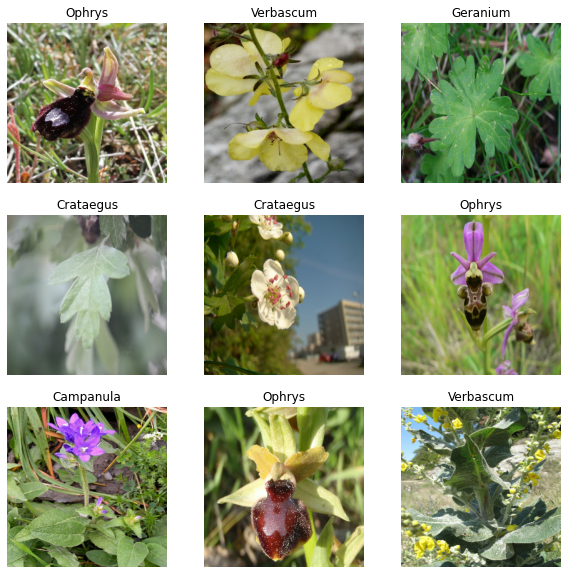

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Baseline CNN model

Requirements

In [15]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input

In [16]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [30]:
val_dataset = image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=123,
    validation_split=0.2, subset="validation", interpolation='bilinear', follow_links=False)

Found 4340 files belonging to 16 classes.
Using 868 files for validation.


In [18]:
from tensorflow.keras import layers

In [19]:
img_height, img_width = (256,256)

In [20]:
num_classes = 16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
import tensorflow.keras.losses 

model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0

In [26]:
epochs=
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/10
136/136 [==============================] - 155s 1s/step - loss: 2.1850 - accuracy: 0.2763 - val_loss: 1.8554 - val_accuracy: 0.4320
Epoch 2/10
136/136 [==============================] - 149s 1s/step - loss: 1.8055 - accuracy: 0.4302 - val_loss: 1.5760 - val_accuracy: 0.5184
Epoch 3/10
136/136 [==============================] - 152s 1s/step - loss: 1.5009 - accuracy: 0.5184 - val_loss: 1.1827 - val_accuracy: 0.6371
Epoch 4/10
136/136 [==============================] - 159s 1s/step - loss: 1.1328 - accuracy: 0.6475 - val_loss: 0.8525 - val_accuracy: 0.7362
Epoch 5/10
136/136 [==============================] - 151s 1s/step - loss: 0.6648 - accuracy: 0.7878 - val_loss: 0.4901 - val_accuracy: 0.8583
Epoch 6/10
136/136 [==============================] - 150s 1s/step - loss: 0.4023 - accuracy: 0.8742 - val_loss: 0.2346 - val_accuracy: 0.9366
Epoch 7/10
136/136 [==============================] - 133s 976ms/step - loss: 0.2165 - accuracy: 0.9288 - val_loss: 0.1696 - val_accuracy: 0.9

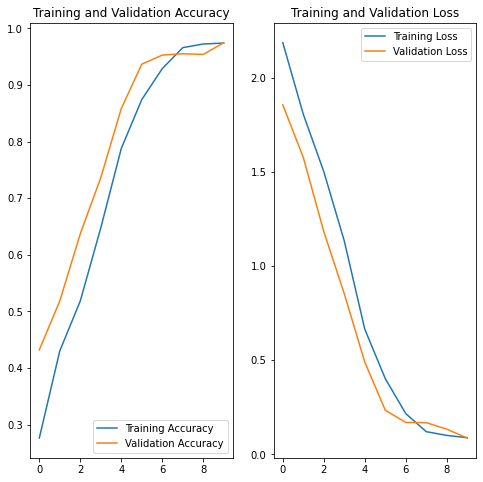

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()